# MAESTRÍA INTELIGENCIA ARTIFICIAL APLICADA

#### **Nombre:** Raham Castillo

Como parte del desarrollo de este proyecto de investigación se ha dado énfasis en la implementación de la metodología KDD partiendo de la comprensión del negocio con un enfoque que va desde el análisis empresarial, el desarrollo e implementación y hasta la presentación de los resultados.

# 1. Comprensión del negocio

### **Determinar los objetivos empresariales**

**Contexto:** En este trabajo de investigación se usa una base de datos de abandono de clientes bancarios de acceso libre tomada de Kaggle. Sin embargo, lo que se busca en este estudio, es encontrar comportamientos en los datos de clientes que ayuden a extraer patrones y comportamientos que permitan predecir el abandono de futuros clientes utilizando aprendizaje automático y aprendizaje profundo.

**Objetivos empresariales**: Desde el punto de vista empresarial es importante integrar tecnologías de minería de datos (Data Mining), que puedan ser utilizadas para realizar análisis de datos históricos y actuales para mejorar la retención de una organización. Se ha planteando los siguientes objetivos:
 - Disminuir la probabildiad de pérdida de clientes.
 - Plantear estrategias de retención dentro de la institución bancaria.


 **Criterios de éxito empresarial:** Considerando un enfoque empresarial, predecir que un cliente actual o nuevo (socio) está a punto de abandonar el banco puede aumentar su rentabilidad al aumentar ingresos, crecimiento en términos de expansión y mercado como la satisfacción del cliente con el incremento de la tasa de retención.

### **Establecer los objetivos de minería de datos**

**Objetivos de minería de datos**: Los objetivos que se ha planteado para el desarrollo de este proyecto son:
- Encontrar patrones que contribuyan a la problemática del abandono de clientes.
- Generar modelos que identifiquen si un cliente es propenso o no de abandonar el banco.

**Criterios de éxito de la minería de datos:** Como parte de la minería de datos y éxito de la misma, se va a predecir con las varibles seleccionadas utilizando la metodología KDD  si un cliente tiende o no al abandono obteniendo un valor superior al 80% de acierto durante el proceso de evaluación.

### **Redactar el plan del proyecto**

Para llevar a cabo este proyecto se ha planificado todas las etapas que constan en la tabla adjunta, donde se establece su tiempo estimado de cada una de las fases que conforman la metodología KDD.

<table>
  <tr>
    <th>Fase</th>
    <th>Tiempo</th>
  </tr>
  <tr>
    <td>Comprensión de los datos / Selección</td>
    <td>2 semanas</td>
  </tr>
  <tr>
    <td>Preparación de los datos / Preprocesamiento y transformación</td>
    <td>3 semanas</td>
  </tr>
  <tr>
    <td>Modelado / Data mining</td>
    <td>2 semanas</td>
  </tr>
  <tr>
    <td>Evaluación / Interpretación y evaluación</td>
    <td>2 semanas</td>
  </tr>
  <tr>
    <td>Implementación o despliegue / Presentación y uso del conocimiento</td>
    <td>3 semanas</td>
  </tr>
</table>

En la evaluación inicial de las técnicas y herramientas de este trabajo de investigación para la presentación de las solucicón. Se ha planteado el uso de la herramienta de software Google Colab. En lo que concierne a las técnicas para el desarrollo, implementación y evaluación del modelo se tiene python como lenguaje principal en la tarea de los modelos de clasificación:
- Random Forest
- Regresión logística
- Árboles de decisión
- SVM
- Redes neuronales

# 2. Comprensión de los datos / Selección

A continuación, se explora los dataset existentes para encontrar el más apropiado que se ajuste a la presente investigación.

Para realizar el análisis de la predicción de pérdida de clientes bancarios es importante contar con una base de datos que posea un conjunto de variables que recolecten información tanto del comportamiento del cliente como sus características demográficas y financieras. Es por ello que se ha seleccionado el siguientes dataset "Churn_Modelling.csv":
[Bank Customer Churn Prediction](https://www.kaggle.com/datasets/shubhammeshram579/bank-customer-churn-prediction/data)


## 2.1. Imports Básicos

Procedemos con la importación de algunas librerías que permiten la carga y visualización de los datos.

In [4]:
#Import basicos
import pandas as pd #Cargar y manipular datos
import numpy as np #Calculos y operaciones con datos
import matplotlib
matplotlib.use('Agg')

import matplotlib.pyplot as plt #Gráficos a nivel general
import seaborn as sns #Gráficos estadísticos
sns.set(style='darkgrid')
%matplotlib inline

## 2.2. Carga inicial de los datos

Se carga el archivo CSV "Churn_Modelling.csv".

In [5]:
#Carga de Dataset
data = pd.read_csv('datasets/Churn_Modelling.csv',sep=",")

## 2.3. Diccionario de los datos

El conjunto de datos incluye información sobre:
<ol><li>
Satisfacticón del cliente (tasa de abandono): historial del churn (cliente que ha abandonado o no el banco).
<li>
Información financiera del cliente: ID, duración, saldo, cantidad de productos bancarios, si el cliente tiene tarjeta de crédito, si el cliente es un miembro activo, puntuación crediticia y el salario estimado del cliente.<li>
Datos demográficos y personal sobre los clientes: género, edad, geografía y apellido.</ol>

<table>
  <tr>
    <th>Nombre de Campo</th>
    <th>Descripción</th>
    <th>Tipo de Variable</th>
    <th>Tipo de Dato</th>
  </tr>
  <tr>
    <td>CustomerId</td>
    <td>Un identificador único para cada cliente</td>
    <td>Entero</td>
    <td></td>
  </tr>
  <tr>
    <td>Surname</td>
    <td>El apellido del cliente</td>
    <td>Categórico Nominal</td>
    <td></td>
  </tr>
  <tr>
    <td>CreditScore</td>
    <td>El puntaje de crédito del cliente</td>
    <td>Entero</td>
    <td></td>
  </tr>
  <tr>
    <td>Geography</td>
    <td>La ubicación geográfica del cliente</td>
    <td>Categórico Nominal</td>
    <td>France, Germany, Spain</td>
  </tr>
  <tr>
    <td>Gender</td>
    <td>El género del cliente</td>
    <td>Categórico nominal</td>
    <td>Male, Femanle</td>
  </tr>
  <tr>
    <td>Age</td>
    <td>La edad del cliente</td>
    <td>Flotante</td>
    <td></td>
  </tr>
    <tr>
    <td>Tenure</td>
    <td>El número de años que el cliente ha estado con el banco</td>
    <td>Entero</td>
    <td></td>
  </tr>
  <tr>
    <td>Balance</td>
    <td>El saldo de la cuenta bancaria del cliente</td>
    <td>Flotante</td>
    <td></td>
  </tr>
  <td>NumOfProducts</td>
    <td>El número de productos bancarios que el cliente utiliza</td>
    <td>Entero</td>
    <td></td>
  </tr>
  <td>HasCrCard</td>
    <td>Indica si el cliente tiene una tarjeta de crédito</td>
    <td>Booleano, Flotante</td>
    <td>(1 = si, 0 = no)<td>
  </tr>
  <td>IsActiveMember</td>
    <td>Indica si el cliente es un miembro activo</td>
    <td>Booleano, Flotante</td>
    <td>(1 = si, 0 = no)<td>
  </tr>
  <td>EstimatedSalary</td>
    <td>El salario estimado del cliente</td>
    <td>Flotante</td>
    <td><td>
  </tr>
  <td>Exited</td>
    <td>Variable objetivo que indica si el cliente ha abandonado el banco</td>
    <td>Booleano</td>
    <td>(1 = si, 0 = no)<td>
  </tr>
</table>

## 2.4 Análisis inicial de los datos

In [6]:
#Dimensión del Dataset
data.shape

(10002, 14)

La base de datos de la pérdida de clientes bancarios cuenta con un total de 14 columnas y 10.002 registros, lo que resulta ser un dataset bastante compacta en cuanto a la información que presenta. Se revisará más a detalle para identificar los atributos que serán necesarios antes de procesar los datos y modelar las predicciones.

In [7]:
#Columnas disponibles
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [8]:
#Tipos de datos disponibles
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


A simple vista se puede apreciar la existencia de variables cualitativas como cuantitativas que serán importantes analizarlas.

##### **Información de las variables**
Del resumen mostrado podemos mencionar lo siguiente. Posee 14 variables en total:
- 6 variables de tipo entero (int64)
- 5 variables de tipo flotante (float64)
- 3 variables categóricas
- La última columna corresponde a la variable a predecir y el resto de variables se debe analizarlas para validar si contribuyen a la predicción de abandono.

In [9]:
# Analizado los primeros datos
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


La primera y segunda columna corresponde al número de filas del dataset y al ID del cliente, columnas que no contienen información importante para el análisis de este estudio por lo que sería apropiado eliminarlas, procedimiento que será considerado más adelante.

## 2.5. Análisis de variables cuantitativas

Se inicia con un breve análisis descritivo de las varibles para comprender los datos y obtener características como la distribución, medidas de tendencia central como la media, la dispersión de los datos con la desviación estándar y la aparición de valores atípicos.
Se considera el análisis por medio de tablas de frecuencia, visualizaciones con diagramas de barras, diagramas de caja (boxplots), gráficos de dispersión y de pastel.

In [10]:
#!pip install skimpy

In [11]:
#import skimpy
#skimpy.skim(data) # Resumen de todo el dataset

# A continuación, se muestra un resumen de los datos.

In [12]:
# A su vez, se puede realizar un análisis rápido de los campos numéricos con describe
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10002.000000,1.000200e+04,10002.000000,10001.000000,10002.000000,10002.000000,10002.000000,10001.000000,10001.000000,10002.000000,10002.000000
mean,5001.499600,1.569093e+07,650.555089,38.922311,5.012498,76491.112875,1.530194,0.705529,0.514949,100083.331145,0.203759
std,2887.472338,7.193177e+04,96.661615,10.487200,2.891973,62393.474144,0.581639,0.455827,0.499801,57508.117802,0.402812
min,1.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2501.250000,1.562852e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50983.750000,0.000000
50%,5001.500000,1.569073e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.000000,1.000000,100185.240000,0.000000
75%,7501.750000,1.575323e+07,718.000000,44.000000,7.000000,127647.840000,2.000000,1.000000,1.000000,149383.652500,0.000000
max,10000.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


Del resumen presentado, nos fijamos en:

- **count**: en este caso, no existe una gran presencia de valores nulos (1 valor nulo para ciertos datos).
- **min** y **max**: para determinar valores atípicos o posibles errores en los datos. Observamos que:

Exited
0    7964
1    2038
Name: count, dtype: int64


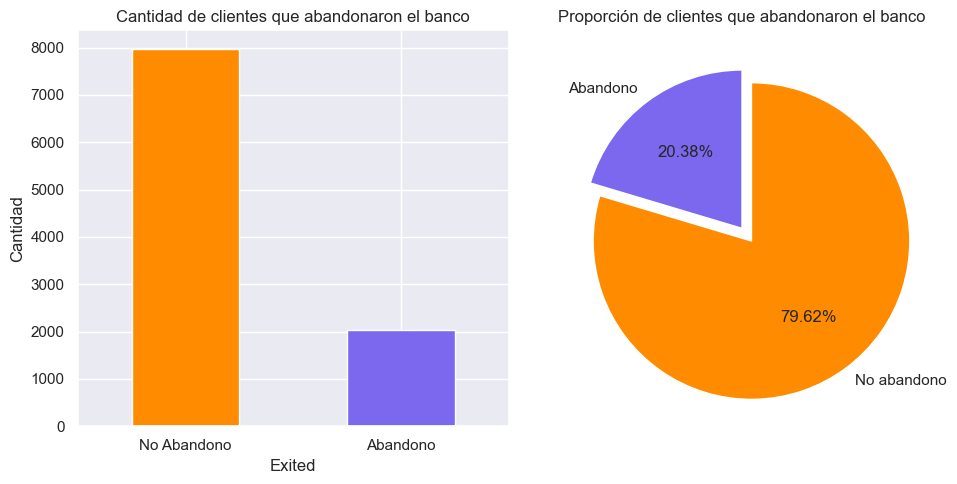

In [13]:
# Calcular la cantidad de clientes que abandonaron (exited) y los que no
exited_count = data["Exited"].value_counts ()
print(exited_count)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Gráfica de barras
data["Exited"].value_counts().plot(kind = "bar", ax = axes[0], color = ['#FF8C00','#7B68EE'])
axes[0].set_title('Cantidad de clientes que abandonaron el banco')
axes[0].set_ylabel('Cantidad')
axes[0].set_xticklabels(["No Abandono", "Abandono"], rotation=0)

# Gráfica de pastel para la variable "Exited"
etiquetas = ["Abandono", "No abandono"]
valores_exited = [data.Exited[data['Exited']==1].count(), data.Exited[data['Exited']==0].count()]
explode = (0, 0.1)
axes[1].pie(valores_exited, labels = etiquetas, autopct = '%.2f%%', startangle = 90, explode = explode, colors = ['#7B68EE','#FF8C00'])
axes[1].set_title('Proporción de clientes que abandonaron el banco')
plt.tight_layout()
plt.show()

Considerando que el 20.38% es un porcentaje pequeño y representa a una quinta parte de los datos totales, es importante asegurarse que los modelos a realizar puedan predecir con gran exactitud la clase minoritaria (abandono), debido a que al banco le interesa identificar, comprender y conservar al grupo de abandono, en lugar de predecir con mayor exactitud la clase que no abandono.


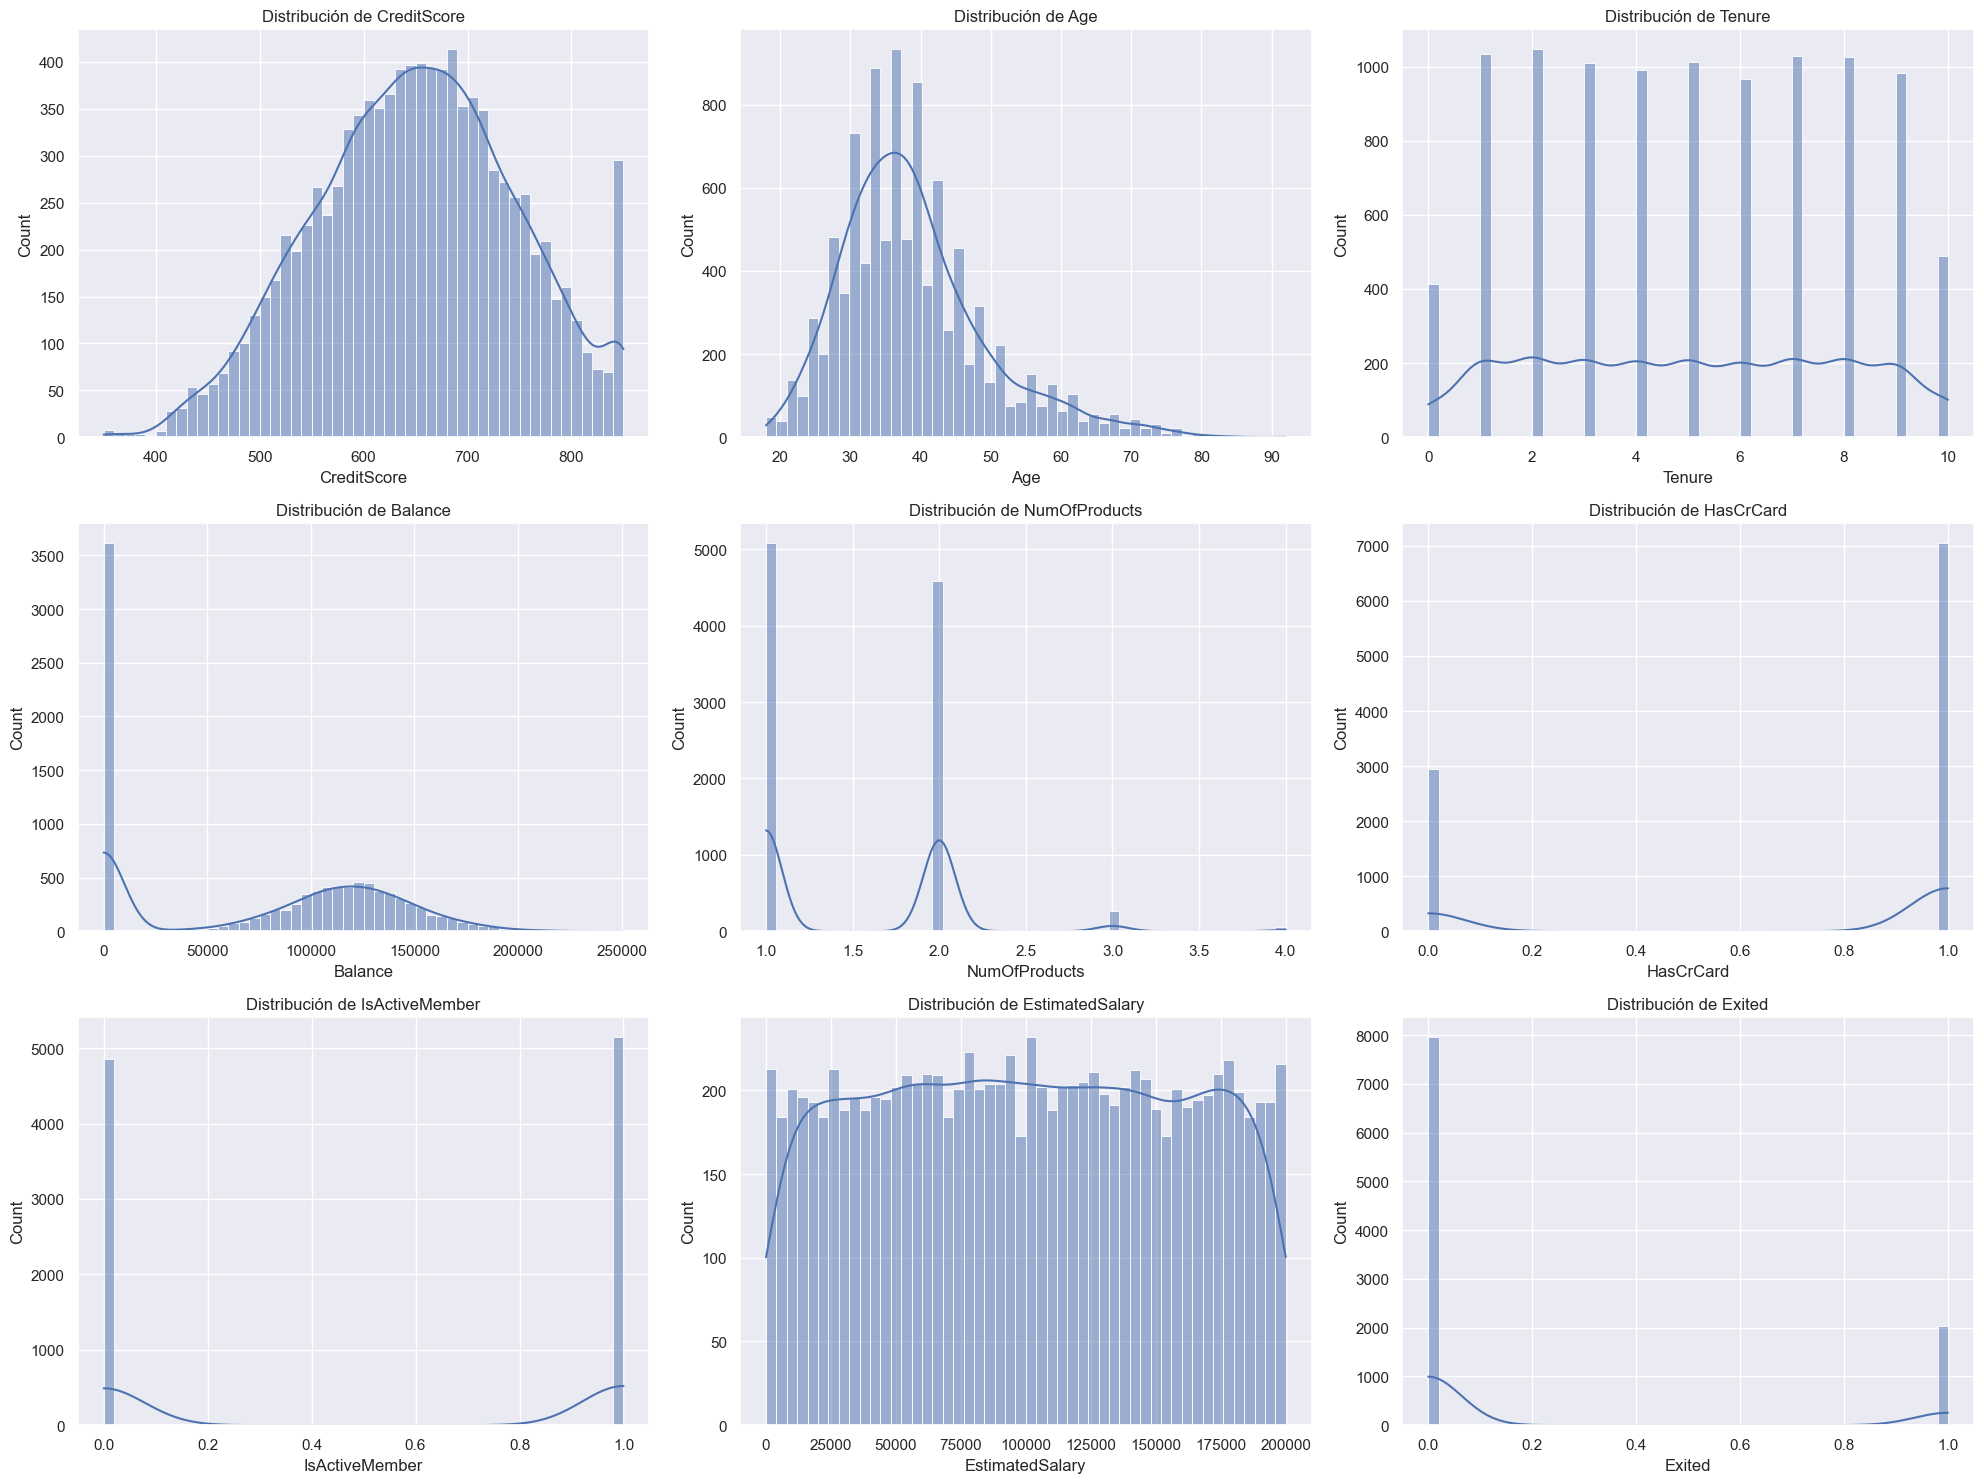

In [14]:
# Histogramas de las variables numéricas
col_numericas = ['CreditScore',	'Age',	'Tenure',	'Balance', 'NumOfProducts',
               'HasCrCard',	'IsActiveMember',	'EstimatedSalary',	'Exited']

plt.figure(figsize=(20, 15))
for i, col in enumerate(col_numericas, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[col], kde=True, bins=50)
    plt.title(f'Distribución de {col}')
plt.tight_layout()
plt.show()

### Comentario sobre las Variables

#### CreditScore:
- Centralidad: Tiene un valor promedio alrededor de 650, con una desviación estándar que indica cierta variabilidad.
- Simetría y Distribución: Presenta una distribución aproximadamente normal.
- Valores Atípicos: Podrían existir algunos valores atípicos en los extremos.

#### Age:
- Centralidad: Edad promedio de alrededor de 40 años.
- Simetría y Distribución: Probablemente sesgada hacia la derecha, con más clientes en el rango de edad adulto.
- Valores Atípicos: Pocos valores atípicos, especialmente en el extremo de la derecha, además se puede considerar un comportamiento normal del cliente ya que a más edad se tiene una mayor experiencia y exigencia para cuidar su dinero.

#### Tenure:
- Centralidad: Tenencia promedio de 5 años en la entidad.
- Simetría y Distribución: Distribución uniforme.
- Valores Atípicos: No se visualiza la presencia de valores atípicos.

#### Balance
- Centralidad: La mayoría de los clientes pueden tener un saldo en cuenta relativamente bajo.
- Simetría y Distribución: Podría estar sesgada hacia la derecha, con algunos clientes teniendo saldos muy altos.
- Valores Atípicos: No se visualiza valores atípicos, pero sería importante analizar la gran cantidad de clientes que tiene saldo "0" en la cuenta.

#### NumOfProducts:

- Centralidad: En promedio, los clientes utilizan entre 1 y 2 productos bancarios.
- Simetría y Distribución: Distribución discreta.
- Valores Atípicos: Los clientes con más de 3 productos pueden ser considerados atípicos.

#### EstimatedSalary:

- Centralidad: Salario promedio estimado alrededor de $100100.
- Simetría y Distribución: Distribución puede ser aproximadamente uniforme.
- Valores Atípicos: Algunos salarios extremadamente altos o muy bajos pueden ser considerados valores atípicos.

#### HasCrCard
- La mayoría de clientes cuenta con una tarjeta de crédito '1'.
- Presenta un desequilibrio, ya que predomina la clase "1" con un valor de meida de 0.7055.

#### IsActiveMember
- Existe una división equitativa entre los miembros activos '1' y los que no están activos '0'.
- La media es de 0.5149 y su desviación estándar de 0.4998.

#### Exited
- Existe una mayor concentración en los clientes que no '0' han abandonado el banco.
- El valor de la media proporciona la tasa de abandono general de los clientes.



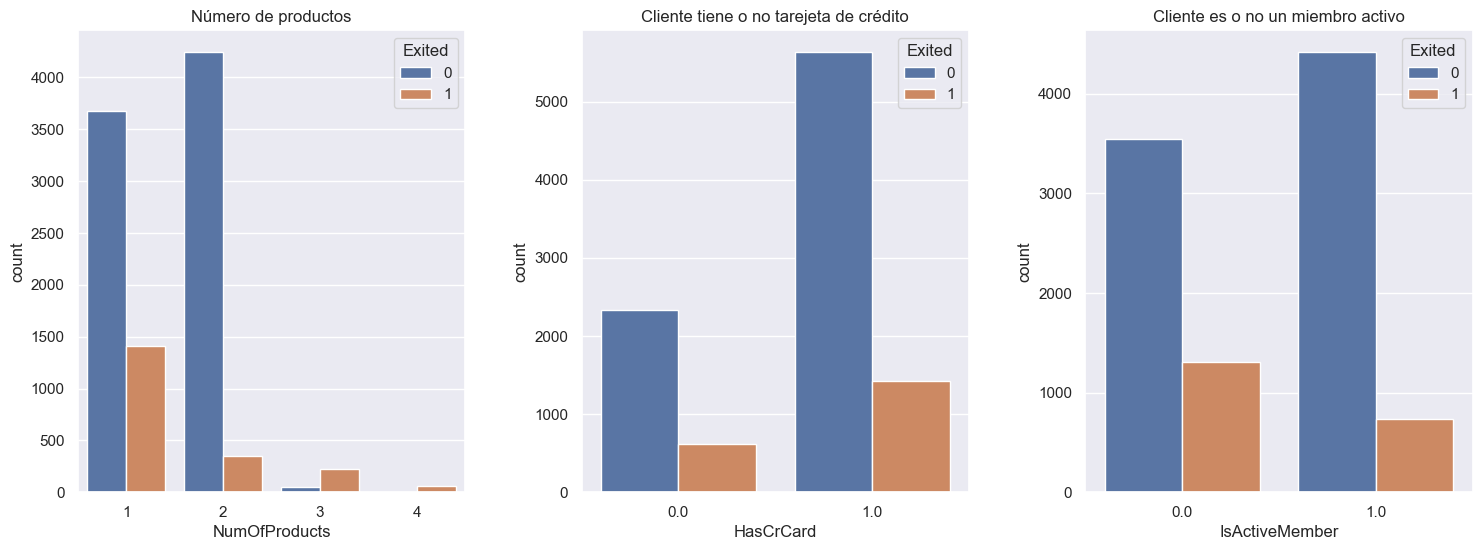

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
plt.subplots_adjust(wspace=0.3)
sns.countplot(x = 'NumOfProducts', hue="Exited", data = data, ax = axes[0]).set_title("Número de productos")
sns.countplot(x = 'HasCrCard', hue="Exited", data = data, ax = axes[1]).set_title("Cliente tiene o no tarejeta de crédito")
sns.countplot(x = 'IsActiveMember', hue="Exited", data = data, ax = axes[2]).set_title("Cliente es o no un miembro activo")
plt.show()

Del resultado gráfico de estas variables podemos argumentar lo siguiente:
- Curiosamente la gran parte de clientes que cuenta con un solo producto es mucho más propenso al abandono del banco, tal vez por la falta de beneficios dentro de la institución lo que limite su uso.
- Se aprecia que la mayoría de clientes que deciden cambiar de banco son los que poseen tarjetas de crédito. Curiosamente la tendencia que existe en que gran parte de clientes con tarjetas de crédito puede ser un índice de la mala experiencia o las tasas muy elevadas.
- Los miembros inactivos son más propensos al abandono lo que indica que el banco debe tomar acciones para mejorar su interacción y convertirlos a un grupo más activo, tal vez utilizando técnicas de recompensa por su uso o tasas de intereses más económicas.

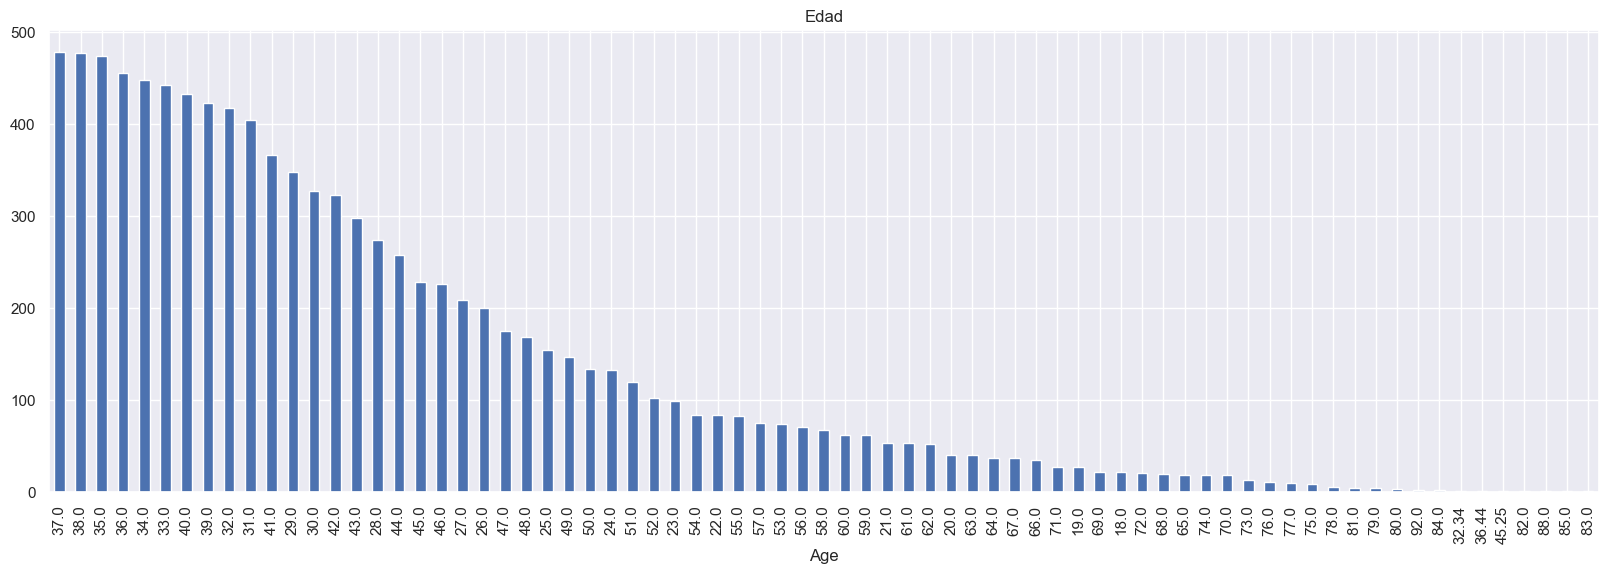

In [16]:
# Gráfica de la frecuencia de las edades
data["Age"].value_counts().plot.bar(figsize=(20,6))
plt.title('Edad')
plt.show()

Se presenta una gráfica de frecuencias de las edades donde se muestra que mas de 100 clientes entre 23 a 52 años de edad poseen una cuenta bancaria o al menos dan uso de un producto en un banco.

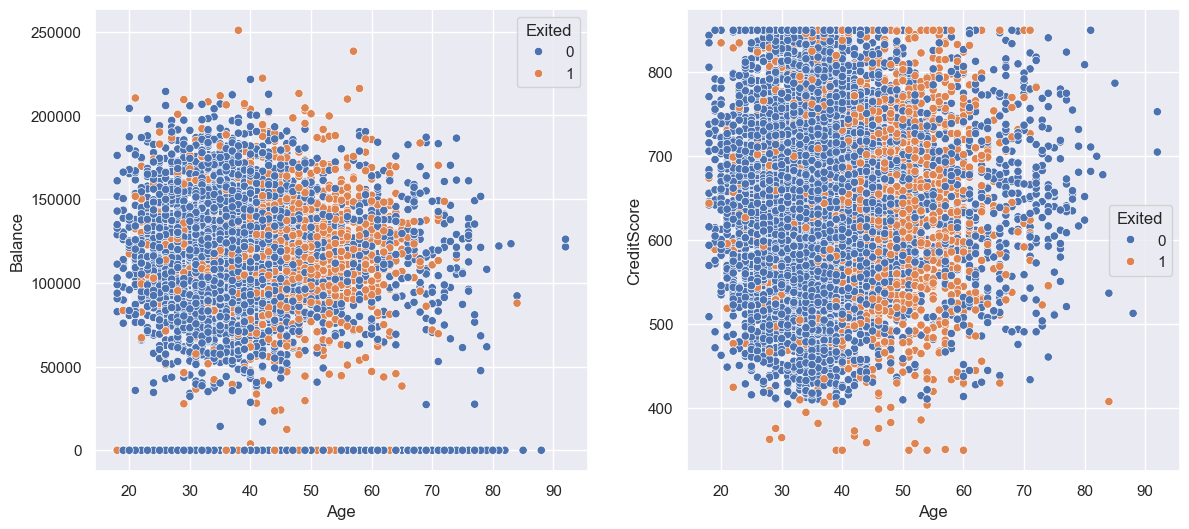

In [17]:
#sns.set(palette="Set2")
fig, ax =  plt.subplots(1, 2, figsize=(14, 6))
#cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.scatterplot(x = "Age", y = "Balance", hue = "Exited", data = data, ax=ax[0])
sns.scatterplot(x = "Age", y = "CreditScore", hue = "Exited", data = data, ax=ax[1])
plt.show()

Por medio de este gráfico de dispersión se puede apreciar que los clientes en
el rango de 40 a 70 años tienen más probabilidades de abandonar el banco, como también clientes que tengan una puntuación crediticia inferior a 400 puntos.

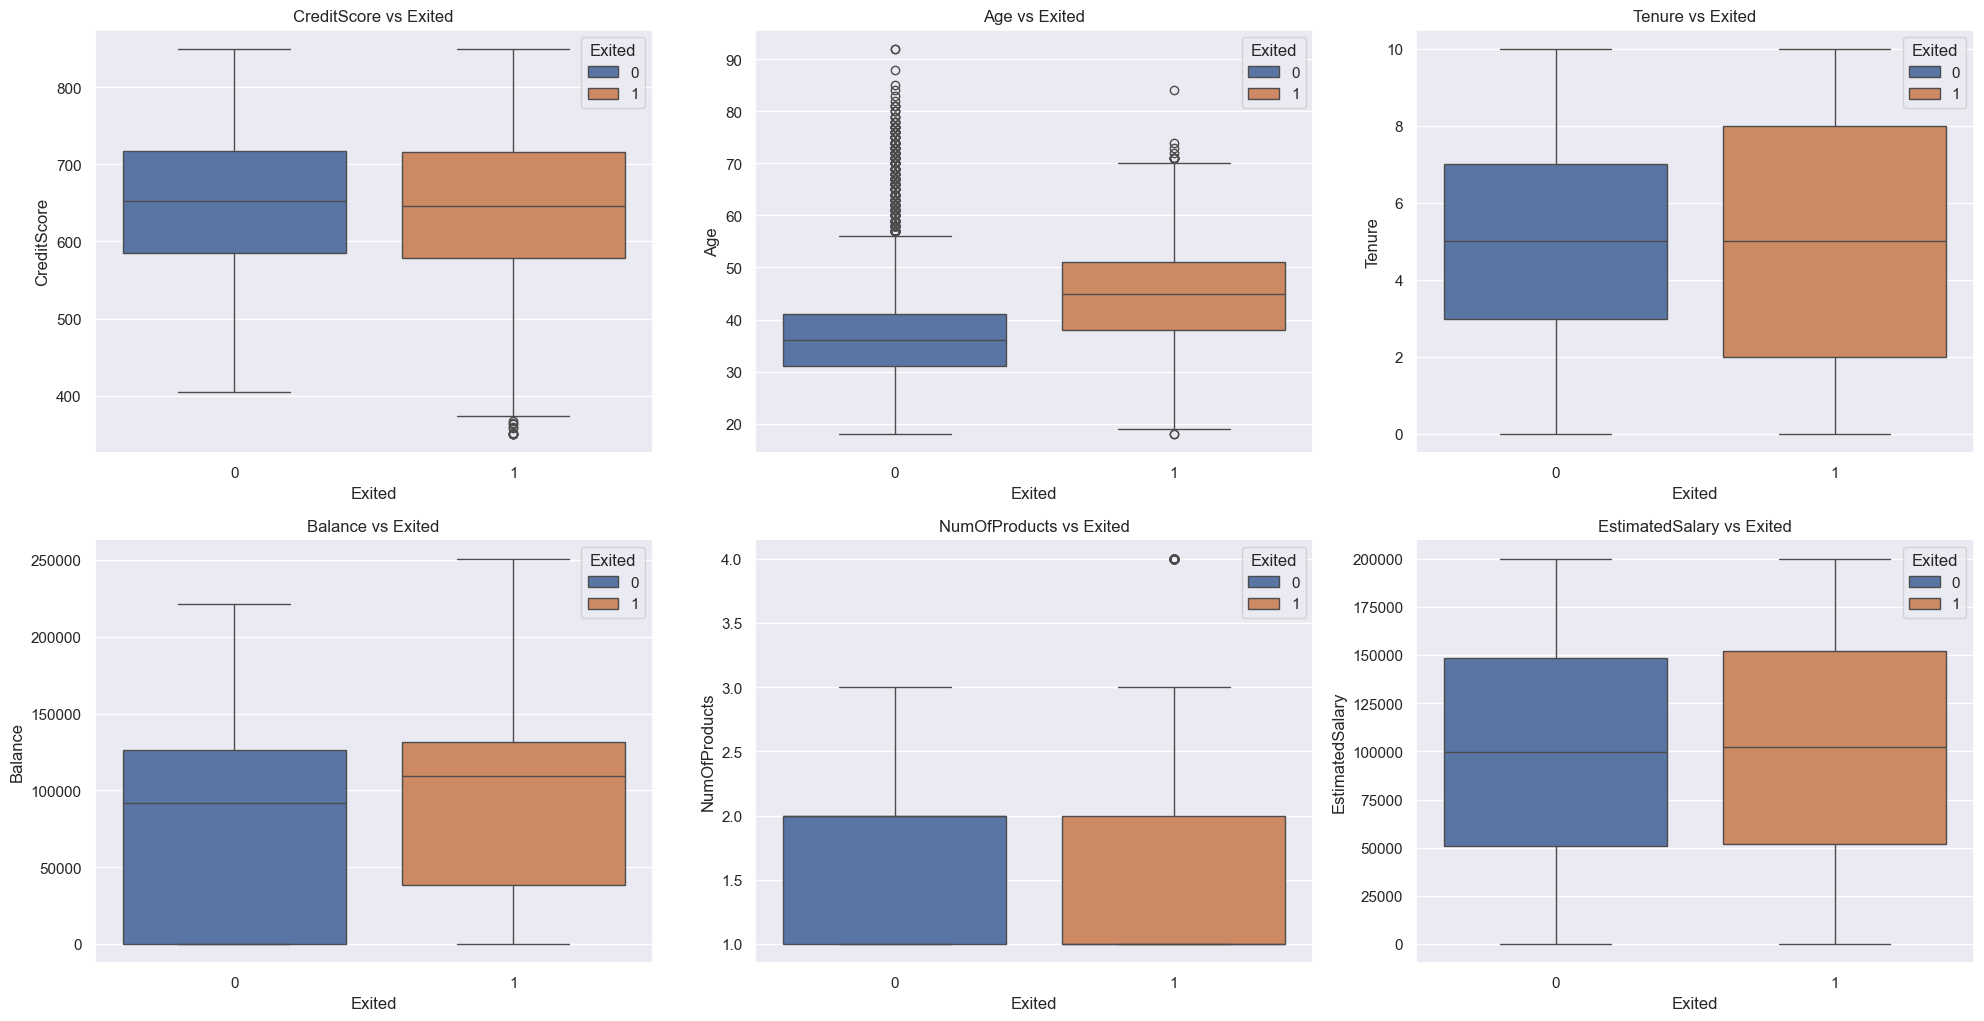

In [18]:
# Gráficas de cajas (boxplots)
col_numericas2 = ['CreditScore',	'Age',	'Tenure',	'Balance', 'NumOfProducts',
               'EstimatedSalary']
target = 'Exited'

plt.figure(figsize=(20, 15))
for i, columnas in enumerate(col_numericas2, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=target, y=columnas, data=data, hue = 'Exited')
    plt.title(f'{columnas} vs {target}')
plt.tight_layout()
plt.show()

Mediante el análisis gráfico de los diagramas de caja se concluye lo siguiente:
- En la puntuación crediticia (CreditScore) se presenta algunos valores que se encuentran por debajo de la media y la aparición de lo que podría ser valores atípicos, aunque puede ser un comportamiento normal debido a que a un menor puntaje se relaciona directamente al abandono del banco.
- Los clientes de mayor edad (Age) tienden a abandonar el banco en una mayor proporción que personas jóvenes lo que se puede concluir que, el servicio brindado no es acorde a todas las edades y requiere una mayor atención para todos los grupos de edades.
- Para la permanencia (Tenure) no se muestra valores atípicos, debido a que la permanencia media se encuentra en el medio, aunque se debe considerar que los clientes ubicados en los extremos (poco tiempo o mucho tiempo en el banco) son más propensos al abandono.
- En cuanto al saldo en cuenta (Balance) del cliente se puede apreciar que los clientes que aportan mayor capital al banco son más propensos a abandonar el banco, lo que es preocupante para las institución debido a que está perdiendo grandes cantidades de dinero.
- En el número de productos (NumOfProducts) no existe un efecto significativo, aunque se puede ver la presencia de un cliente que posee 4 productos mucho más que la media del resto de usuarios.
- El salario estimado (EstimatedSalary) no presenta mayor variación entre las dos clases por lo que puede ser que no tenga incidencia significativa para la predicción.

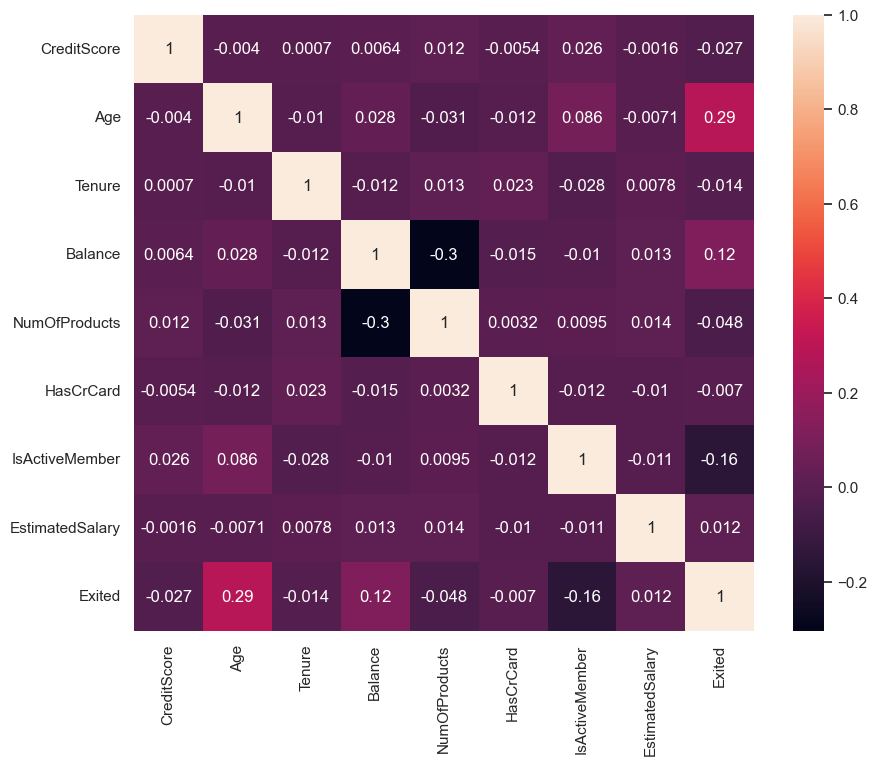

In [19]:
# Gráfico de la correlación de las variables numéricas
corr = data[col_numericas].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True)
plt.show()

En la gráfica de correlación se visualiza que las variables "Age" y "Balance" son los atributos que mayor correlación tienen con la variable a predecir con valores de 0.29 y 0.12 respectivamente.

## 2.6. Análisis de variables Cualitativas

A continuación se procede a realizar el análisis de las variables categóricas del dataset y encontrar su influencia para la predicción.

In [20]:
categorical_attributes = data.select_dtypes(include=['object'])
categorical_attributes.dtypes

Surname      object
Geography    object
Gender       object
dtype: object

Se realiza un agrupamiento para visualizar el conteo, suma y la media de las variables categóricos.

Text(0.5, 1.0, 'Distribución por Gender')

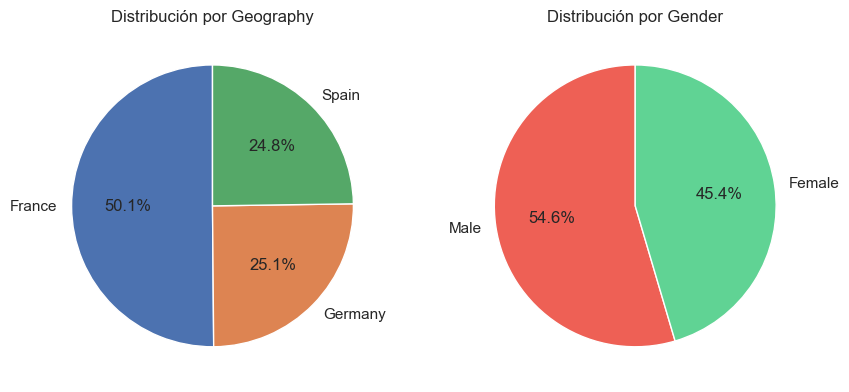

In [21]:
# Contar la frecuencia de cada categoría
Geography_counts = data['Geography'].value_counts()
Gender_counts = data['Gender'].value_counts()

# Gráfica de pastel de "Geography" y "Gender"
fig, axs = plt.subplots(1, 2, figsize=(10, 6))

# Gráfica de pastel para la categoría 'Geography'
axs[0].pie(Geography_counts, labels=Geography_counts.index, autopct='%1.1f%%', startangle=90)
axs[0].set_title('Distribución por Geography')

# Gráfica de pastel para la categoría 'Gender'
colores = ["#EE6055","#60D394"]
axs[1].pie(Gender_counts, labels=Gender_counts.index, autopct='%1.1f%%', startangle=90, colors=colores)
axs[1].set_title('Distribución por Gender')

Se visualiza que la mayor parte de los datos pertenecen al país de Francia, aunque la proporción de clientes que abandonan el banco es muy similar entre Francia y Alemania lo que permite argumentar que el banco tal vez no a proporcionado los suficientes recursos en los dos países que su alcance es menor.
A pesar de que exista una mayor cantidad de clientes hombres (Male) existe una alta presencia en el abandono de clientes mujeres en comaparación a los hombres.

In [22]:
data[['Surname', 'Exited']].groupby(['Surname'], as_index=False).agg(['count','sum','mean'])

Surname Exited          
                count sum  mean
0        Abazu      2   0  0.00
1        Abbie      1   0  0.00
2       Abbott      4   1  0.25
3     Abdullah      1   1  1.00
4      Abdulov      2   0  0.00
...        ...    ...  ..   ...
2927   Zubarev      3   0  0.00
2928  Zubareva      1   0  0.00
2929      Zuev      1   0  0.00
2930     Zuyev      2   1  0.50
2931    Zuyeva      2   0  0.00

[2932 rows x 4 columns]

La variable "Surname" no tiene incidencia en el estudio de los datos por lo que es recomendable eliminar la columna.

In [23]:
data[['Geography', 'Exited']].groupby(['Geography'], as_index=False).agg(['count','sum','mean'])

Geography Exited               
             count  sum      mean
0    France   5014  810  0.161548
1   Germany   2510  815  0.324701
2     Spain   2477  413  0.166734

La variable "Geography" si discrimina la variable target.

In [24]:
data[['Gender', 'Exited']].groupby(['Gender'], as_index=False).agg(['count','sum','mean'])

Gender Exited                
           count   sum      mean
0  Female   4544  1139  0.250660
1    Male   5458   899  0.164712

La variable "Gender" si discrimina la variable target.

Nos quedamos con las 2 variables categóricas.

*   Geography
*   Gender

# 3. Tratamiento de datos

En esta sección se realiza el tratamiento y procesamiento de los datos.

## 3.1. Verificar valores nulos

In [25]:
# Verificar valores nulos
missing_values = data.isnull().sum()
missing_values

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

Se puede validar la existencia de 1 valor nulo en las siguientes variables:

*   Geography
*   Age
*   HasCrCard
*   IsActiveMember



Reemplazamos el valor nulo por la moda (categoría más frecuente) en la variable "Geography".

In [26]:
moda = data['Geography'].mode()[0]
moda

'France'

In [27]:
data['Geography'].fillna(moda, inplace=True)

C:\Users\rdcastillo47\AppData\Local\Temp\ipykernel_19332\1854974795.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Geography'].fillna(moda, inplace=True)


Se reemplaza por la mediana los valores nulos de la variable "Age" ya que es más robusta frente a valores atípicos y es útil cuando la distribución es asimétrica.

In [28]:
data['Age'].fillna(data['Age'].median(), inplace=True)

C:\Users\rdcastillo47\AppData\Local\Temp\ipykernel_19332\913469570.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)


Se reemplaza los valores nulos con el valor más frecuente (moda) de las variables booleanas. Es más simple y mantiene la distribución original de la variable.

In [29]:
moda_HasCrCard = data['HasCrCard'].mode()[0]
data['HasCrCard'].fillna(moda_HasCrCard, inplace=True)

C:\Users\rdcastillo47\AppData\Local\Temp\ipykernel_19332\1282394567.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['HasCrCard'].fillna(moda_HasCrCard, inplace=True)


In [30]:
moda_IsActiveMember = data['IsActiveMember'].mode()[0]
data['IsActiveMember'].fillna(moda_IsActiveMember, inplace=True)

C:\Users\rdcastillo47\AppData\Local\Temp\ipykernel_19332\3501927358.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['IsActiveMember'].fillna(moda_IsActiveMember, inplace=True)


In [31]:
missing_values = data.isnull().sum()
missing_values

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [32]:
# Verificar duplicados
duplicates = data.duplicated().sum()
duplicates

np.int64(2)

In [33]:
# Eliminar registros duplicados
data = data.drop_duplicates()

# Verificar el número de registros después la eliminación
data.shape

(10000, 14)

In [34]:
data.to_csv("datasets/Churn_Modelling_clean.csv", index = False)
print("DataFrame exportado a 'Churn_Modelling_clean'")

DataFrame exportado a 'Churn_Modelling_clean'


In [35]:
data_traduccion = data.copy()

In [36]:
data_traduccion['Geography'] = data_traduccion['Geography'].replace({
    'Spain': 'España',
    'France': 'Francia',
    'Germany': 'Alemania'
})

In [37]:
data_traduccion['Gender'] = data_traduccion['Gender'].replace({
    'Male': 'Masculino',
    'Female': 'Femenino'
})

In [38]:
data_traduccion.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,Francia,Femenino,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,España,Femenino,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,Francia,Femenino,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,Francia,Femenino,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,España,Femenino,43.0,2,125510.82,1,1.0,1.0,79084.10,0


In [39]:
data_traduccion.to_csv("datasets/Churn_Modelling_clean_traduccion.csv", index = False)
print("DataFrame exportado a 'Churn_Modelling_clean_traducido'")

DataFrame exportado a 'Churn_Modelling_clean_traducido'


## 3.2. Cambiar tipo de variables

In [40]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [41]:
data['Geography_encoded']= data['Geography'].map({'Spain':0, 'Germany':1, 'France':2})

In [42]:
data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [43]:
data['Gender_encoded']= data['Gender'].map({'Male':0, 'Female':1})

In [44]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_encoded,Gender_encoded
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1,2,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0,0,1
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1,2,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0,2,1
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,1.0,1.0,79084.10,0,0,1


Se convierte al tipo de dato correcto las Variables "Age", "HasCrCard" y "IsActiveMember" de flotante a entero.

In [45]:
# Convertir las variables de flotante a entero
data['Age'] = data['Age'].astype(int)
data['HasCrCard'] = data['HasCrCard'].astype(int)
data['IsActiveMember'] = data['IsActiveMember'].astype(int)

In [46]:
# Verificar duplicados
#duplicates = data.duplicated().sum()
#duplicates

In [47]:
# Eliminar registros duplicados
#data = data.drop_duplicates()

# Verificar el número de registros después la eliminación
#data.shape

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 10000
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   RowNumber          10000 non-null  int64  
 1   CustomerId         10000 non-null  int64  
 2   Surname            10000 non-null  object 
 3   CreditScore        10000 non-null  int64  
 4   Geography          10000 non-null  object 
 5   Gender             10000 non-null  object 
 6   Age                10000 non-null  int64  
 7   Tenure             10000 non-null  int64  
 8   Balance            10000 non-null  float64
 9   NumOfProducts      10000 non-null  int64  
 10  HasCrCard          10000 non-null  int64  
 11  IsActiveMember     10000 non-null  int64  
 12  EstimatedSalary    10000 non-null  float64
 13  Exited             10000 non-null  int64  
 14  Geography_encoded  10000 non-null  int64  
 15  Gender_encoded     10000 non-null  int64  
dtypes: float64(2), int64(11), o

In [49]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_encoded',
       'Gender_encoded'],
      dtype='object')

In [50]:
drop_elements = ['RowNumber', 'CustomerId', 'Surname', 'Geography','Gender'] # Dataset escenario 1

In [51]:
drop_elements3 = ['RowNumber', 'CustomerId', 'Surname', 'Geography','Gender','Geography_encoded'] # Dataset escenario 3

In [52]:
data_encoded = data.drop(drop_elements, axis = 1)
data_encoded.head(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_encoded,Gender_encoded
0,619,42,2,0.00,1,1,1,101348.88,1,2,1
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,2,1


In [53]:
data_encoded.to_csv("datasets/Churn_Modelling_escenario1.csv", index = False)
print("DataFrame exportado a 'Churn_Modelling_escenario1'")

DataFrame exportado a 'Churn_Modelling_escenario1'


In [54]:
data_encoded3 = data.drop(drop_elements3, axis = 1)
data_encoded3.head(3)
data_encoded3.to_csv("datasets/Churn_Modelling_escenario3.csv", index = False)
print("DataFrame exportado a 'Churn_Modelling_escenario3'")

DataFrame exportado a 'Churn_Modelling_escenario3'


## 3.3. Selección de variables

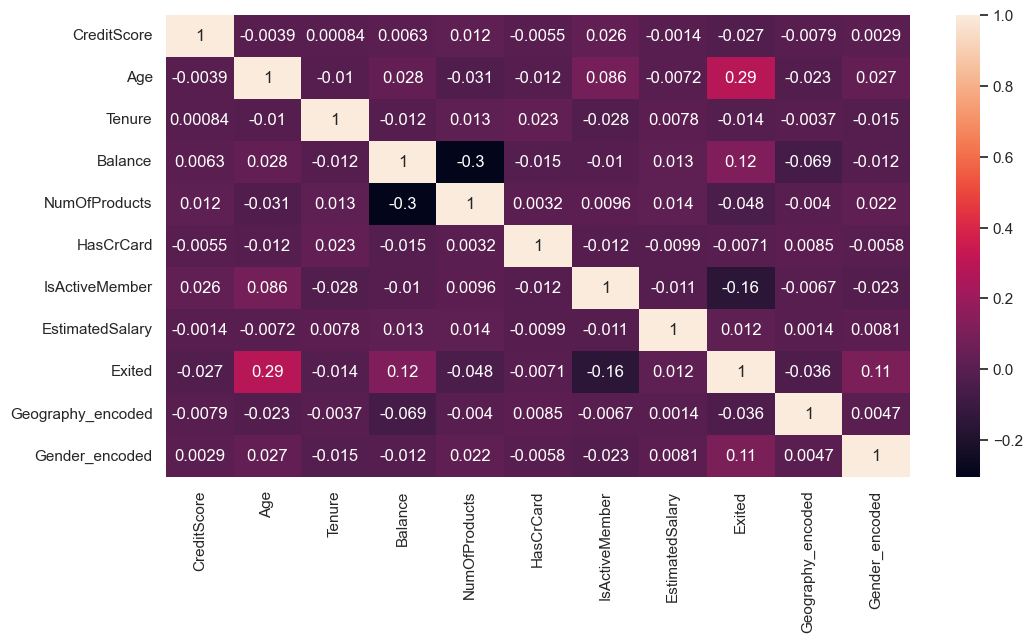

In [55]:
corr = data_encoded.corr()
plt.figure(figsize=(12,6))
sns.heatmap(corr, annot=True)
plt.show()

In [56]:
from sklearn.feature_selection import SelectKBest

X=data_encoded.drop(['Exited'], axis=1)
y=data_encoded['Exited']

best=SelectKBest(k=4)
X_new = best.fit_transform(X, y)
X_new.shape
selected = best.get_support(indices=True)
print(X.columns[selected])

Index(['Age', 'Balance', 'IsActiveMember', 'Gender_encoded'], dtype='object')


In [57]:
# Seleccionamos las mejores variables para el escenario 2
columns_best = ['Age', 'Balance', 'IsActiveMember', 'Gender_encoded', 'Exited']

data_best_columns = data_encoded[columns_best]
data_best_columns

,Age,Balance,IsActiveMember,Gender_encoded,Exited
0,42,0.00,1,1,1
1,41,83807.86,1,1,0
2,42,159660.80,0,1,1
3,39,0.00,0,1,0
4,43,125510.82,1,1,0
...,...,...,...,...,...
9995,39,0.00,0,0,0
9996,35,57369.61,1,0,0
9997,36,0.00,1,1,1
9998,42,75075.31,0,0,1


In [58]:
data_best_columns.to_csv("Churn_Modelling_escenario2.csv", index = False)
print("DataFrame exportado a 'Churn_Modelling_escenario2'")

DataFrame exportado a 'Churn_Modelling_escenario2'


# 3. Modelado / Data mining

In [59]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import confusion_matrix

In [60]:
features = data_encoded.drop('Exited', axis=1)
target = data_encoded['Exited']

# Se divide el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42, stratify = target)

Se aplica **SMOTE** para balancear las clases. Genera muestras sintéticas en la clase minoritaria para equilibrar o equiparar los datos a la clase mayoritaria.

In [61]:
val1 = y_train.value_counts()
val1

Exited
0    5574
1    1426
Name: count, dtype: int64

In [62]:
val2 = y_test.value_counts()
val2

Exited
0    2389
1     611
Name: count, dtype: int64

In [63]:
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

print('Distribución de clases antes del oversampling:', Counter(y_train))
print('Distribución de clases después del oversampling:', Counter(y_train_sm))

Distribución de clases antes del oversampling: Counter({0: 5574, 1: 1426})
Distribución de clases después del oversampling: Counter({0: 5574, 1: 5574})


In [64]:
# Se entrena el modelo con los datos balanceados
model = RandomForestClassifier(random_state=42)
model.fit(X_train_sm, y_train_sm)

# Predecir y evaluar el modelo en el conjunto de prueba
y_pred = model.predict(X_test)

print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Confusion Matrix:
 [[2068  321]
 [ 223  388]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.87      0.88      2389
           1       0.55      0.64      0.59       611

    accuracy                           0.82      3000
   macro avg       0.72      0.75      0.74      3000
weighted avg       0.83      0.82      0.82      3000



In [65]:
# Estandarizar los datos
scaler = StandardScaler()
X_train_sd = scaler.fit_transform(X_train_sm)
X_test_sd = scaler.transform(X_test)

In [66]:
# Definir los parámetros para GridSearchCV
param_grid = {
    'n_estimators': [10, 20, 100],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=3,
                           refit= 'balanced_accuracy',
                           n_jobs=-1,
                           scoring='accuracy',
                           verbose=2)

# Entrenar GridSearchCV
grid_search.fit(X_train_sd, y_train_sm)

# Mejor modelo de GridSearchCV
best_rf = grid_search.best_estimator_

# Predecir y evaluar
y_pred_grid = best_rf.predict(X_test_sd)
print("Random Forest con GridSearchCV")
print("Accuracy:", accuracy_score(y_test, y_pred_grid))
print(classification_report(y_test, y_pred_grid))

# Mostrar los mejores parámetros
print("Mejores parámetros:", grid_search.best_params_)

Fitting 3 folds for each of 162 candidates, totalling 486 fits
Random Forest con GridSearchCV
Accuracy: 0.8173333333333334
              precision    recall  f1-score   support

           0       0.90      0.87      0.88      2389
           1       0.55      0.61      0.57       611

    accuracy                           0.82      3000
   macro avg       0.72      0.74      0.73      3000
weighted avg       0.83      0.82      0.82      3000

Mejores parámetros: {'bootstrap': False, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


Diseño de la experimentación

Escenario 1:
Realizar tres experimentos
- Tres técnicas
- Desbalanceada, Undersampling, Oversampling

Escenario 2:
Lo mismo

- Los 5 modelos seleccionados (experimentar), utilizar los mejores parámetros
- Estandarizar los datos.


Qué tecnicas son mejores ML, DL
Qué técnica de balanceo fue mejor
Qué fue mejor colocar todas las variables o la librería
Qué fue mejor de la configuración de los algoritmos.